In [131]:
'''Linear Support Vector Machine 
(SVM) Classification
Aim: To detect Iris virginica flowers '''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [146]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)
poly_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),StandardScaler(),
LinearSVC(C=10,max_iter=10000))
poly_svm_clf.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=10, max_iter=10000))])

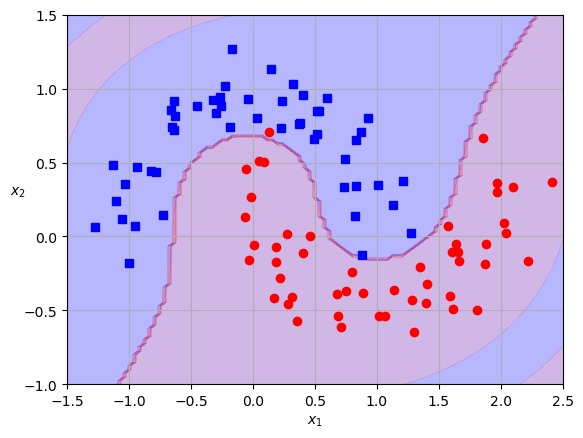

In [147]:
def plot_clf(clf):
    plt.plot(x[:,0][y==0], x[:,1][y==0], 'bs')
    plt.plot(x[:,0][y==1], x[:,1][y==1], 'ro')
    x1 = np.linspace(-1.5, 2.5, 100)
    x2 = np.linspace(-1, 1.5, 100)
    x11, x22 = np.meshgrid(x1, x2)
    x_topredict = np.c_[x11.ravel(), x22.ravel()]
    y_predicted = clf.predict(x_topredict).reshape(x11.shape)
    y_decision = clf.decision_function(x_topredict).reshape(x11.shape)
    plt.contourf(x11, x22, y_predicted,
                 cmap=None, alpha=0.2, colors=['blue', 'red'])
    plt.contourf(x11, x22, y_decision,
                 cmap=None, alpha=0.1, colors=['blue', 'red'])
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.show()

plot_clf(poly_svm_clf)

In [151]:
from sklearn.svm import LinearSVR
x = 3 * np.random.rand(50, 1)
y = 6 + 2 * x[:, 0] + np.random.randn(50)
svm_regression = make_pipeline(StandardScaler(),
                              LinearSVR(epsilon=0.5,
                                       dual=True))
svm_regression.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5))])

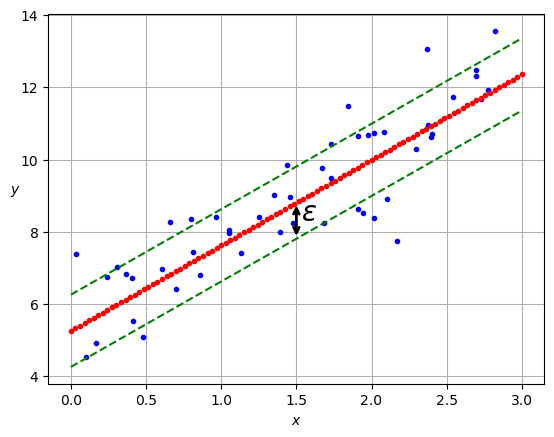

In [168]:
'''Hyperparameter Epsilon controls the width of the street'''
x_topredict=np.linspace(0,3,100).reshape(-1,1)
epsilon = 1.0 # Margin width / 2
eps_ind = 1.5
y_eps = svm_regression.predict([[eps_ind]])
plt.plot(x,y,'.b')
y_predicted = svm_regression.predict(x_topredict)
plt.plot(x_topredict,y_predicted,'.r')
plt.plot(x_topredict,y_predicted+epsilon,'--g')
plt.plot(x_topredict,y_predicted-epsilon,'--g')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.annotate(
        '', xy=(eps_ind, y_eps), xycoords='data',
        xytext=(eps_ind, y_eps - epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 2}
)
plt.text(1.53, 8.3, r"$\epsilon$", fontsize=20)
plt.grid()
plt.show()